In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.feature_selection import chi2, SelectKBest
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             precision_recall_fscore_support, confusion_matrix,
                             roc_auc_score, roc_curve, auc, classification_report)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Googl drive link
file_link = 'https://drive.google.com/file/d/1MBLEc8SYJ1Z1-2SGkfDzcwrTioIaZOpC/view?usp=drive_link'

# Extract the file ID
file_id = file_link.split("/")[-2]

# Create a direct download link
new_link = f'https://drive.google.com/uc?id={file_id}'

# Load CSV into pandas
df = pd.read_csv(new_link)

In [ ]:
df.head()

,Discharge,Feelings and Urge,Pain and Infection,Physical Conditions,Critical Feelings,Critical,Disease
0,Frequent Urination,Fever,Frequent Infection,Rashes,Slow heart rate and pulse,Critical,Diabetes
1,"Yellow,green discharge",Tired,Swollen genitals,NIL,NIL,Not Critical,Diabetes
2,"Yellow,green discharge",Hunger,Swollen genitals,NIL,Severe pelvic pain,Critical,Gonorrhea
3,"Yellow,green discharge",Fever,Headache,NIL,NIL,Not Critical,Diabetes
4,"Yellow,green discharge",Hunger,Headache,NIL,Severe pelvic pain,Critical,Gonorrhea


In [ ]:
df.shape

(4762, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4762 entries, 0 to 4761
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Discharge            4762 non-null   object
 1   Feelings and Urge    4762 non-null   object
 2   Pain and Infection   4762 non-null   object
 3   Physical Conditions  4762 non-null   object
 4   Critical Feelings    4762 non-null   object
 5   Critical             4762 non-null   object
 6   Disease              4762 non-null   object
dtypes: object(7)
memory usage: 260.6+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
Discharge,4762,4,Frequent Urination,1195
Feelings and Urge,4762,4,Hunger,1199
Pain and Infection,4762,7,Muscle Aches,685
Physical Conditions,4762,6,NIL,1008
Critical Feelings,4762,7,NIL,896
Critical,4762,2,Critical,4426
Disease,4762,3,Typhoid,1874


In [ ]:
df.isnull().sum()

,0
Discharge,0
Feelings and Urge,0
Pain and Infection,0
Physical Conditions,0
Critical Feelings,0
Critical,0
Disease,0


In [ ]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}\n")

Discharge: ['Frequent Urination' 'Yellow,green discharge' 'Painful Urination'
 'Difficulties in stooling']

Feelings and Urge: ['Fever' 'Tired' 'Hunger' 'Urge to urinate']

Pain and Infection: ['Frequent Infection' 'Swollen genitals' 'Headache'
 'Anal Itching and Pain' 'Muscle Aches' 'Blurred Vision' 'Abdominal Pain']

Physical Conditions: ['Rashes' 'NIL' 'Bloody diarrhea' 'Excessive Urination and Thirst'
 'Swollen testicles' 'Rose spots']

Critical Feelings: ['Slow heart rate and pulse' 'NIL' 'Severe pelvic pain' 'Seizures'
 'Disorientation' 'Confusion' 'Cough and breathing difficulties']

Critical: ['Critical' 'Not Critical']

Disease: ['Diabetes' 'Gonorrhea' 'Typhoid']



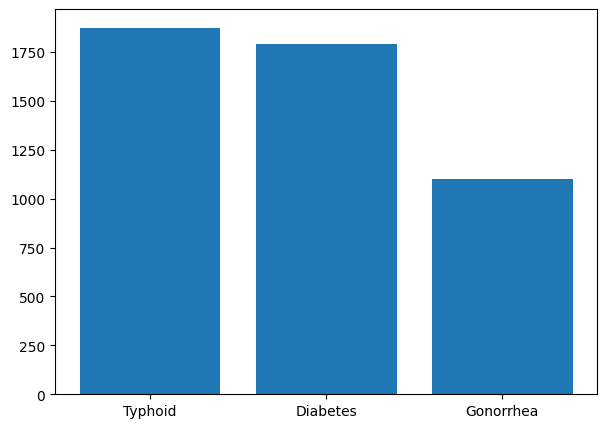

In [ ]:
plt.figure(figsize=(7, 5))
disease_counts = df['Disease'].value_counts()
plt.bar(disease_counts.index, disease_counts.values)
plt.show()

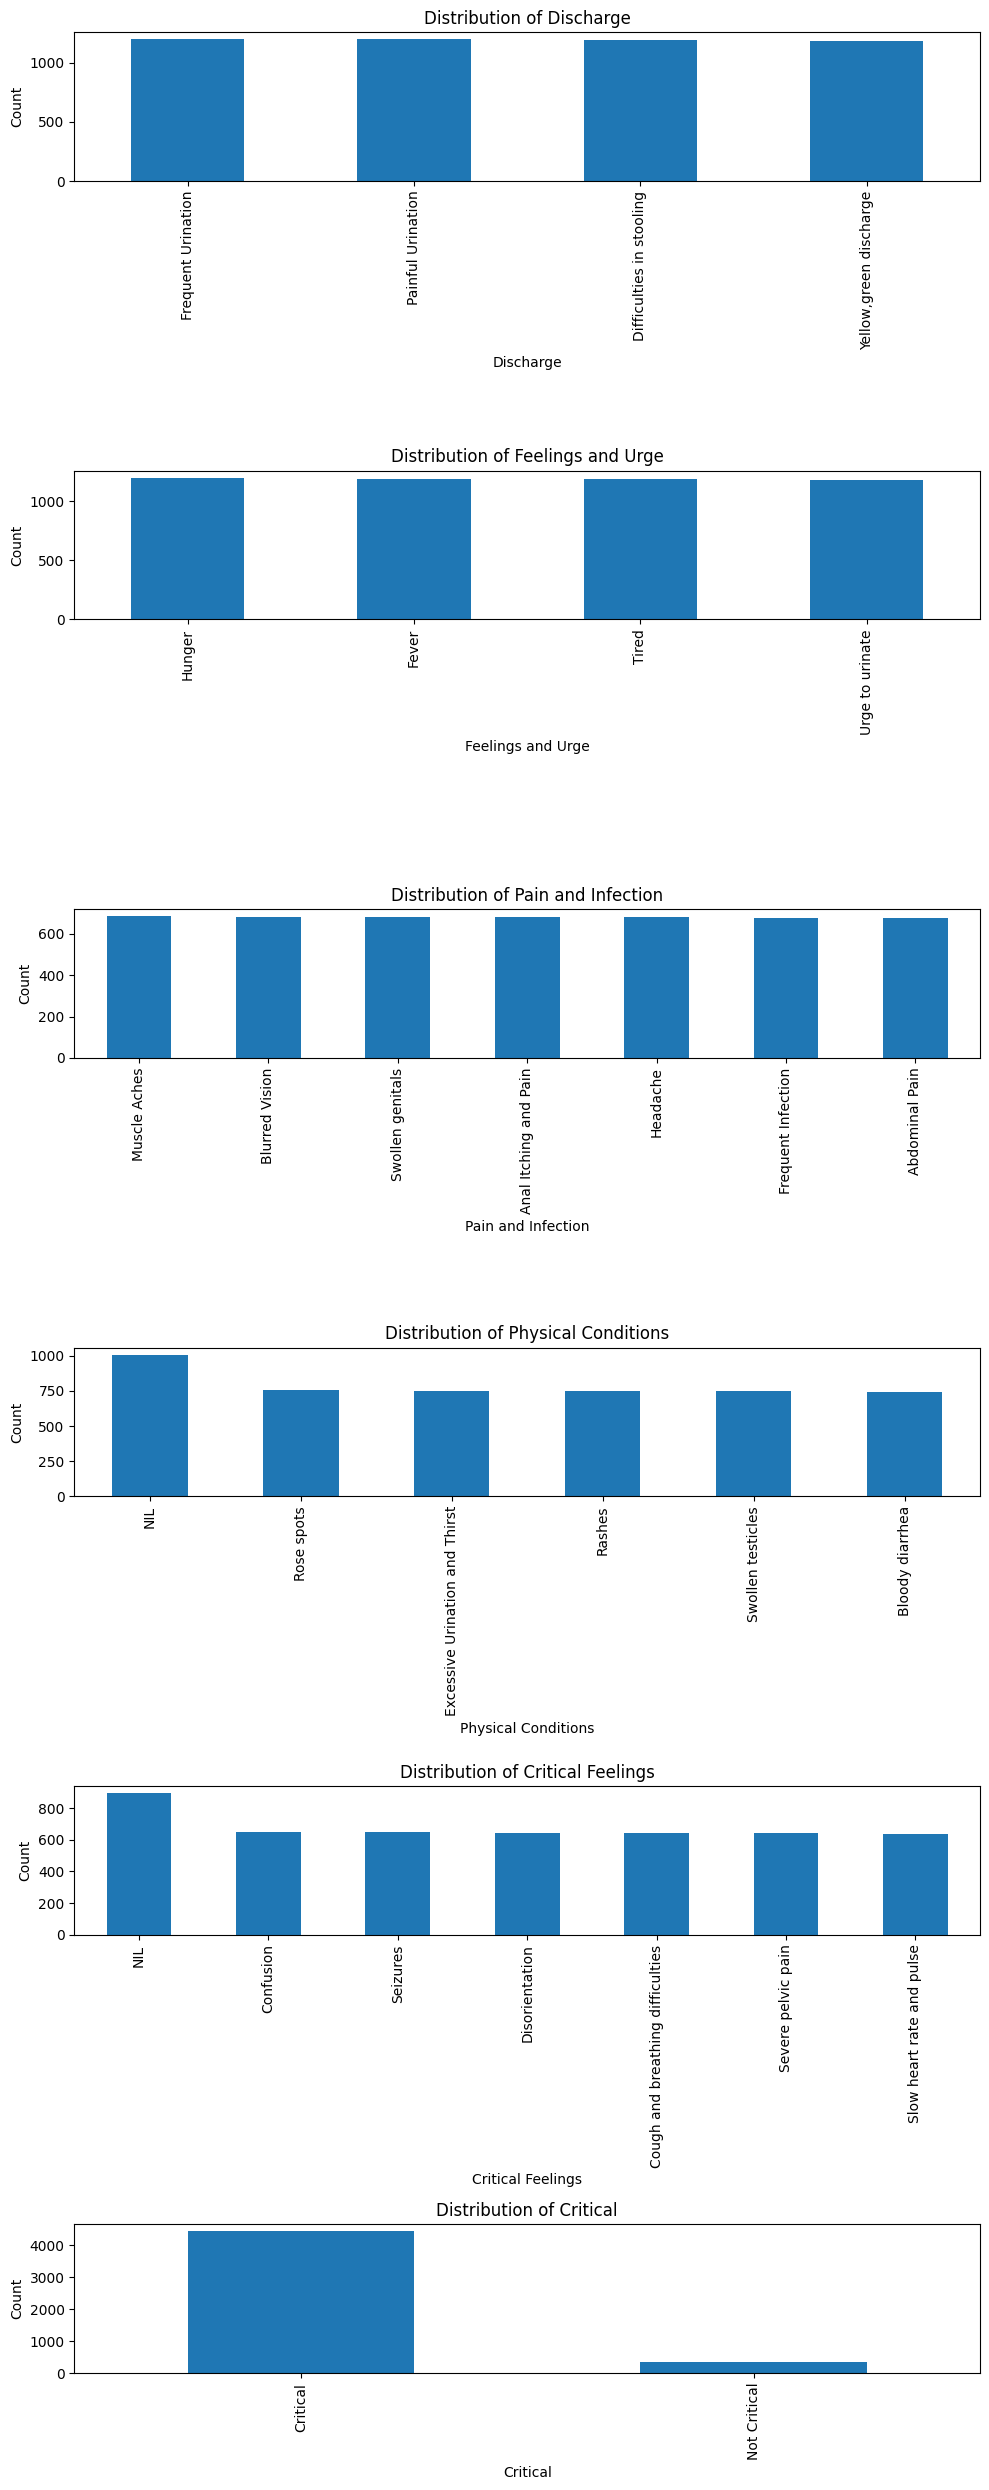

In [ ]:
import matplotlib.pyplot as plt

# Feature columns
feature_columns = ['Discharge', 'Feelings and Urge',
                'Pain and Infection', 'Physical Conditions',
                'Critical Feelings', 'Critical']

# Plot each feature as a separate bar chart
plt.figure(figsize=(10, 25))

for i, col in enumerate(feature_columns, 1):
    plt.subplot(len(feature_columns), 1, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [ ]:
# Label Encoding
df_label = df.copy()
label_encoders = {}

for col in feature_columns:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col])
    label_encoders[col] = le

# Encode target
target_encoder_label = LabelEncoder()
y_label = target_encoder_label.fit_transform(df_label['Disease'])

# Feature matrix
X_label = df_label.drop('Disease', axis=1)

In [ ]:
# one Hot Encoding
df_onehot = df.copy()

ohe = OneHotEncoder(sparse_output=False, drop=None)
X_onehot = ohe.fit_transform(df_onehot[feature_columns])

# Convert to DataFrame with feature names
X_onehot = pd.DataFrame(X_onehot, columns=ohe.get_feature_names_out(feature_columns))

# Encode target
target_encoder_onehot = LabelEncoder()
y_onehot = target_encoder_onehot.fit_transform(df_onehot['Disease'])

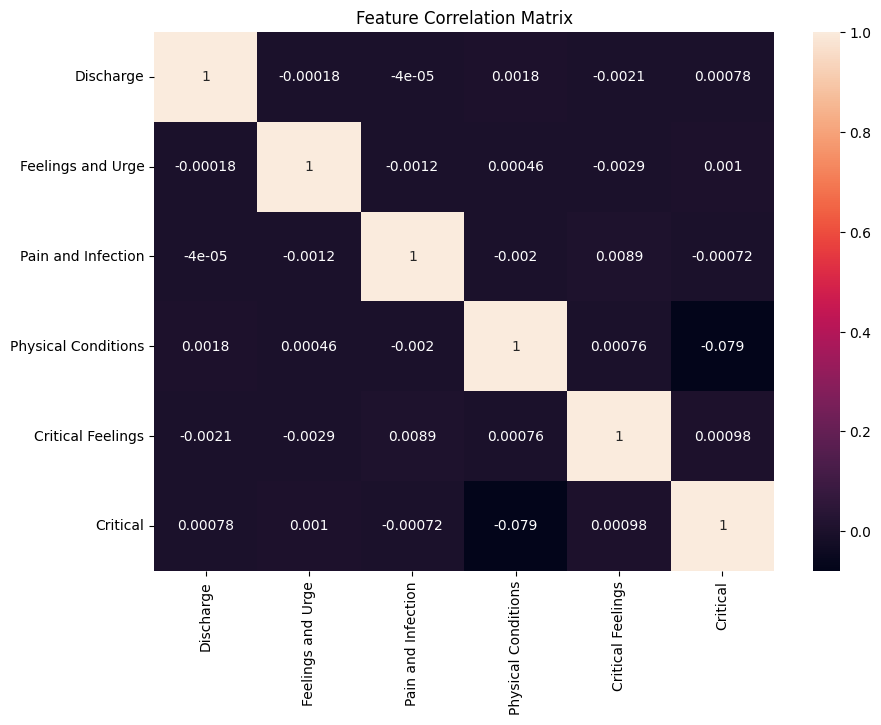

In [ ]:
correlation_matrix = X_label.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# For label encoded
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(
    X_label, y_label, test_size=0.3, random_state=42, stratify=y_label)

# For one-hot encoded
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(
    X_onehot, y_onehot, test_size=0.3, random_state=42, stratify=y_onehot)

Decision Tree Accuracy: 0.94

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       537
           1       0.93      0.91      0.92       330
           2       0.98      0.94      0.96       562

    accuracy                           0.94      1429
   macro avg       0.94      0.94      0.94      1429
weighted avg       0.94      0.94      0.94      1429



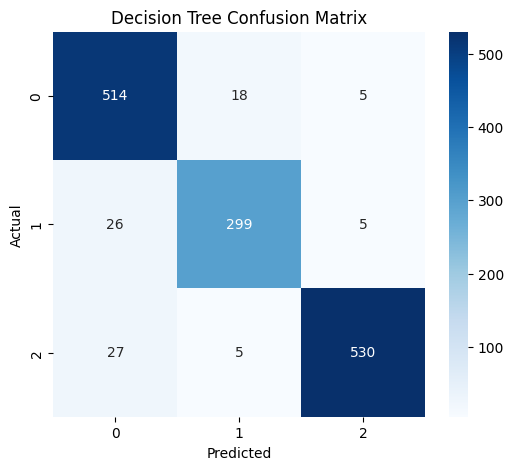

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_label, y_train_label)

# Make predictions
y_pred_dt = dt_model.predict(X_test_label)

acc = accuracy_score(y_test_label, y_pred_dt)
print("Decision Tree Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_label, y_pred_dt, digits=2))

cm = confusion_matrix(y_test_label, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Random Forest Accuracy: 0.94

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       537
           1       0.90      0.91      0.91       330
           2       0.96      0.94      0.95       562

    accuracy                           0.94      1429
   macro avg       0.94      0.94      0.94      1429
weighted avg       0.94      0.94      0.94      1429



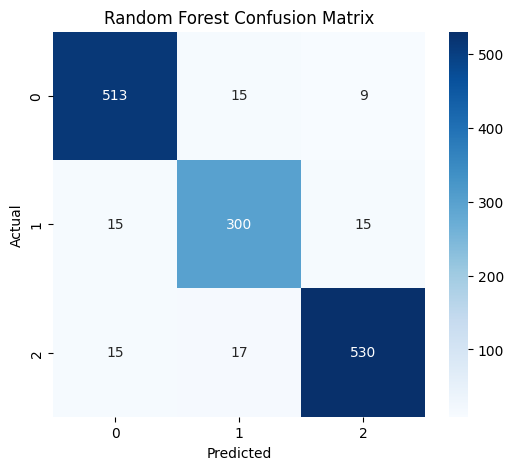

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_label, y_train_label)

# Make predictions
y_pred_rf = rf_model.predict(X_test_label)

acc = accuracy_score(y_test_label, y_pred_rf)
print("Random Forest Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_label, y_pred_rf, digits=2))

cm = confusion_matrix(y_test_label, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

Gradient Boosting Machine Accuracy: 0.95

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       537
           1       0.95      0.91      0.93       330
           2       0.95      0.95      0.95       562

    accuracy                           0.95      1429
   macro avg       0.95      0.94      0.95      1429
weighted avg       0.95      0.95      0.95      1429



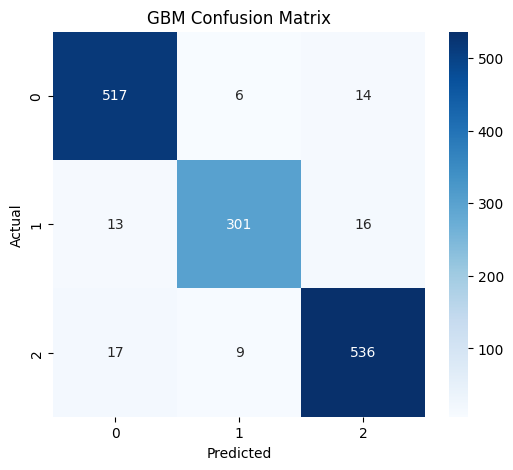

In [ ]:
# Gradient Boosting Machine
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train_label, y_train_label)

# Make predictions
y_pred_gbm = gbm_model.predict(X_test_label)

acc = accuracy_score(y_test_label, y_pred_gbm)
print("Gradient Boosting Machine Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_label, y_pred_gbm, digits=2))

cm = confusion_matrix(y_test_label, y_pred_gbm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GBM Confusion Matrix")
plt.show()

XGBoost Accuracy: 0.94

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       537
           1       0.93      0.91      0.92       330
           2       0.94      0.94      0.94       562

    accuracy                           0.94      1429
   macro avg       0.94      0.94      0.94      1429
weighted avg       0.94      0.94      0.94      1429



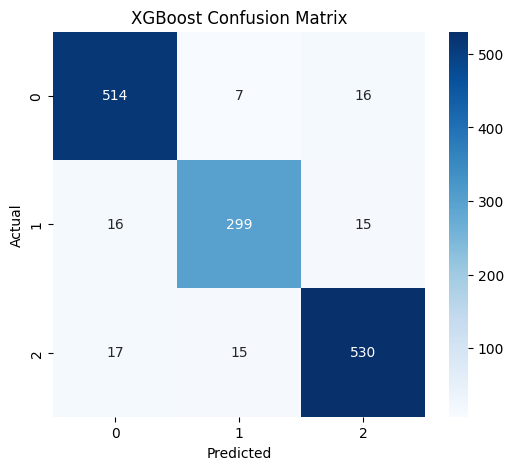

In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100,random_state=42)
xgb_model.fit(X_train_label, y_train_label)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_label)

acc = accuracy_score(y_test_label, y_pred_xgb)
print("XGBoost Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_label, y_pred_xgb, digits=2))

cm = confusion_matrix(y_test_label, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

 K-Nearest Neighbour Accuracy: 0.92

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       537
           1       0.91      0.86      0.89       330
           2       0.95      0.92      0.93       562

    accuracy                           0.92      1429
   macro avg       0.92      0.91      0.92      1429
weighted avg       0.92      0.92      0.92      1429



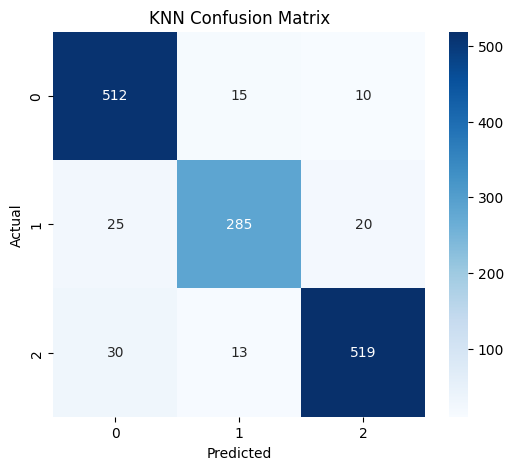

In [ ]:
# K-Nearest Neighbour
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_onehot, y_train_onehot)

# Make predictions
y_pred_knn = knn_model.predict(X_test_onehot)

acc = accuracy_score(y_test_onehot, y_pred_knn)
print(" K-Nearest Neighbour Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_onehot, y_pred_knn))

cm = confusion_matrix(y_test_onehot, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

Support Vector Machine Accuracy: 0.95

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       537
           1       0.98      0.91      0.94       330
           2       0.95      0.95      0.95       562

    accuracy                           0.95      1429
   macro avg       0.95      0.94      0.95      1429
weighted avg       0.95      0.95      0.95      1429



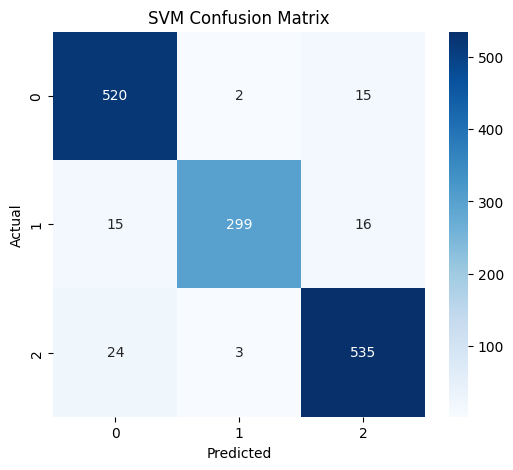

In [ ]:
# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_onehot, y_train_onehot)

# Make predictions
y_pred_svm = svm_model.predict(X_test_onehot)

acc = accuracy_score(y_test_onehot, y_pred_svm)
print("Support Vector Machine Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_onehot, y_pred_svm, digits=2))

cm = confusion_matrix(y_test_onehot, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

Support Vector Machine Accuracy: 0.95

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       537
           1       0.98      0.91      0.94       330
           2       0.95      0.95      0.95       562

    accuracy                           0.95      1429
   macro avg       0.95      0.94      0.95      1429
weighted avg       0.95      0.95      0.95      1429



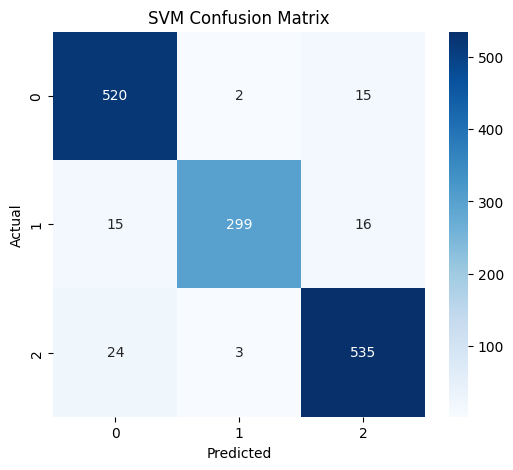

In [ ]:
# Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_onehot, y_train_onehot)

# Make predictions
y_pred_svm = svm_model.predict(X_test_onehot)

acc = accuracy_score(y_test_onehot, y_pred_svm)
print("Support Vector Machine Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_onehot, y_pred_svm, digits=2))

cm = confusion_matrix(y_test_onehot, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

Logistic Regression Accuracy: 0.96

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       537
           1       0.98      0.92      0.95       330
           2       0.93      0.98      0.95       562

    accuracy                           0.96      1429
   macro avg       0.96      0.95      0.96      1429
weighted avg       0.96      0.96      0.96      1429



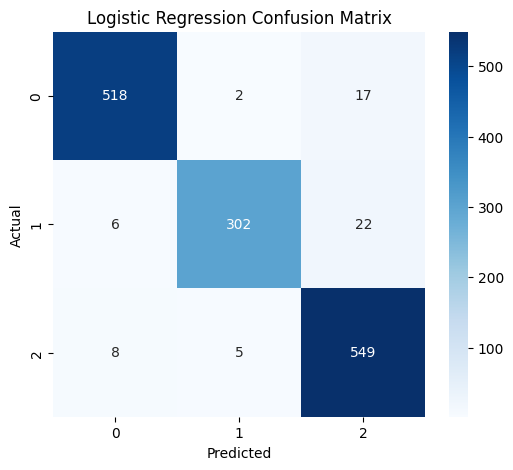

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_onehot, y_train_onehot)

# Make predictions
y_pred_lr = lr_model.predict(X_test_onehot)

acc = accuracy_score(y_test_onehot, y_pred_lr)
print("Logistic Regression Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_onehot, y_pred_lr, digits=2))

cm = confusion_matrix(y_test_onehot, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

MLPClassifier Accuracy: 0.94

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       537
           1       0.94      0.91      0.92       330
           2       0.94      0.94      0.94       562

    accuracy                           0.94      1429
   macro avg       0.94      0.94      0.94      1429
weighted avg       0.94      0.94      0.94      1429



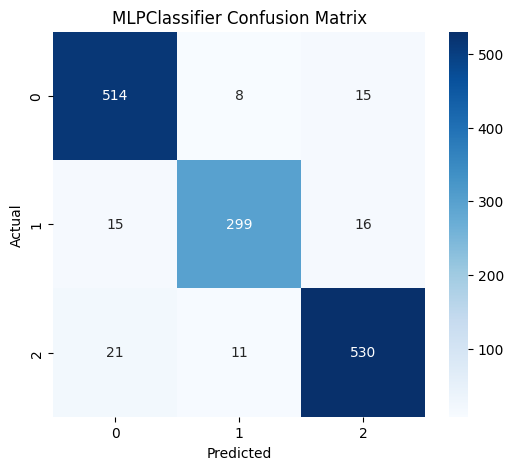

In [ ]:
# MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), batch_size=32, max_iter=500, random_state=42)
mlp_model.fit(X_train_onehot, y_train_onehot)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test_onehot)

acc = accuracy_score(y_test_onehot, y_pred_mlp)
print("MLPClassifier Accuracy:", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test_onehot, y_pred_mlp, digits=2))

cm = confusion_matrix(y_test_onehot, y_pred_mlp)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLPClassifier Confusion Matrix")
plt.show()


In [ ]:
model_preds = {
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "GBM": y_pred_gbm,
    "XGBoost": y_pred_xgb,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "Logistic Regression": y_pred_lr,
    "MLPClassifier": y_pred_mlp
}

results = {}

# Calculate results with conditional y_test selection
for model_name, y_pred in model_preds.items():
    if model_name in ["Decision Tree", "Random Forest", "GBM", "XGBoost"]:
        y_test = y_test_label
    else:
        y_test = y_test_onehot

    results[model_name] = {
        "Accuracy": round(accuracy_score(y_test, y_pred), 2),
        "Precision": round(precision_score(y_test, y_pred, average='macro'), 2),
        "Recall": round(recall_score(y_test, y_pred, average='macro'), 2),
        "F1 Score": round(f1_score(y_test, y_pred, average='macro'), 2)
    }

In [ ]:
results_df = pd.DataFrame(results).T  # transpose so models are rows
print(results_df)

                     Accuracy  Precision  Recall  F1 Score
Decision Tree            0.94       0.94    0.94      0.94
Random Forest            0.94       0.94    0.94      0.94
GBM                      0.95       0.95    0.94      0.95
XGBoost                  0.94       0.94    0.94      0.94
KNN                      0.92       0.92    0.91      0.92
SVM                      0.95       0.95    0.94      0.95
Logistic Regression      0.96       0.96    0.95      0.96
MLPClassifier            0.94       0.94    0.94      0.94


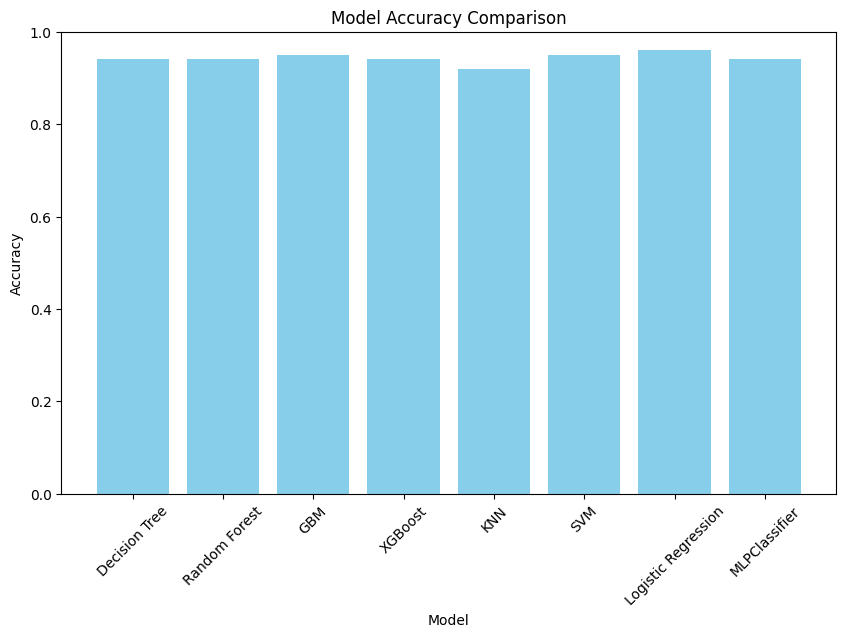

In [ ]:
model_names = list(results.keys())
accuracy_scores = [results[m]["Accuracy"] for m in model_names]

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

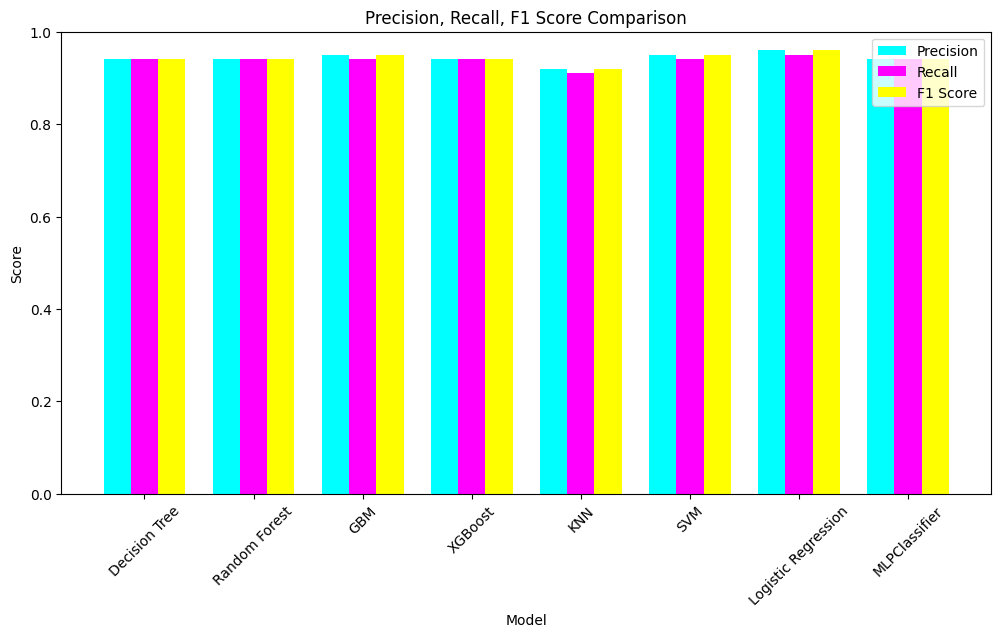

In [ ]:
precision_scores = [results[m]["Precision"] for m in model_names]
recall_scores = [results[m]["Recall"] for m in model_names]
f1_scores = [results[m]["F1 Score"] for m in model_names]

x = np.arange(len(model_names))
bar_width = 0.25

plt.figure(figsize=(12,6))
plt.bar(x - bar_width, precision_scores, width=bar_width, label='Precision', color='cyan')
plt.bar(x, recall_scores, width=bar_width, label='Recall', color='magenta')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='yellow')

plt.xticks(x, model_names, rotation=45)
plt.ylabel("Score")
plt.xlabel("Model")
plt.title("Precision, Recall, F1 Score Comparison")
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
n_classes = len(np.unique(y_label))

y_test_onehot_bin = label_binarize(y_test_onehot, classes=np.arange(n_classes))
y_test_label_bin = label_binarize(y_test_label, classes=np.arange(n_classes))

y_scores = {
    "Decision Tree": dt_model.predict_proba(X_test_label),
    "Random Forest": rf_model.predict_proba(X_test_label),
    "GBM": gbm_model.predict_proba(X_test_label),
    "XGBoost": xgb_model.predict_proba(X_test_label),
    "KNN": knn_model.predict_proba(X_test_onehot),
    "SVM": svm_model.predict_proba(X_test_onehot),
    "Logistic Regression": lr_model.predict_proba(X_test_onehot),
    "MLPClassifier": mlp_model.predict_proba(X_test_onehot),
}

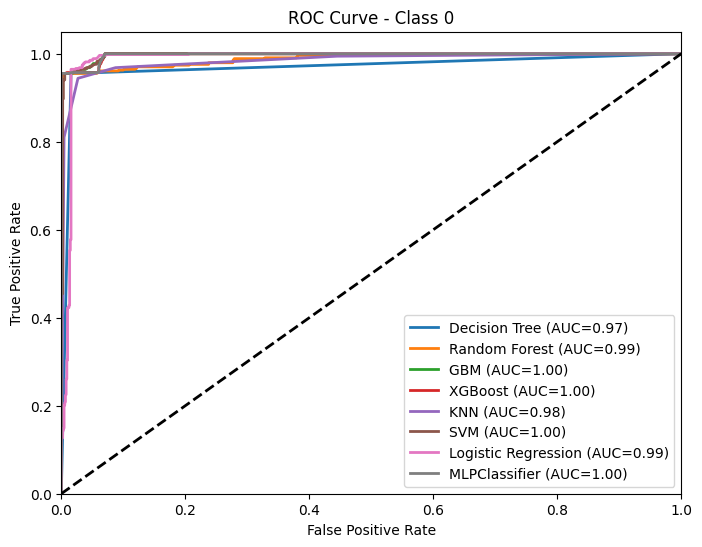

In [ ]:
plt.figure(figsize=(8,6))

for model_name, probs in y_scores.items():
    if model_name in ["Decision Tree", "Random Forest", "GBM", "XGBoost"]:
        y_bin = y_test_label_bin
    else:
        y_bin = y_test_onehot_bin

    # Compute ROC for class 0
    fpr, tpr, _ = roc_curve(y_bin[:, 0], probs[:, 0])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Class 0")
plt.legend(loc="lower right")
plt.show()

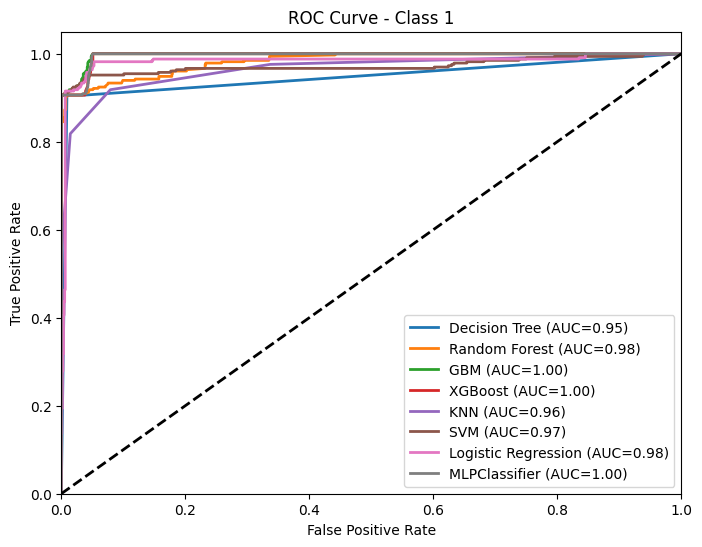

In [ ]:
plt.figure(figsize=(8,6))

for model_name, probs in y_scores.items():
    if model_name in ["Decision Tree", "Random Forest", "GBM", "XGBoost"]:
        y_bin = y_test_label_bin
    else:
        y_bin = y_test_onehot_bin

    # Compute ROC for class 1
    fpr, tpr, _ = roc_curve(y_bin[:, 1], probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Class 1")
plt.legend(loc="lower right")
plt.show()

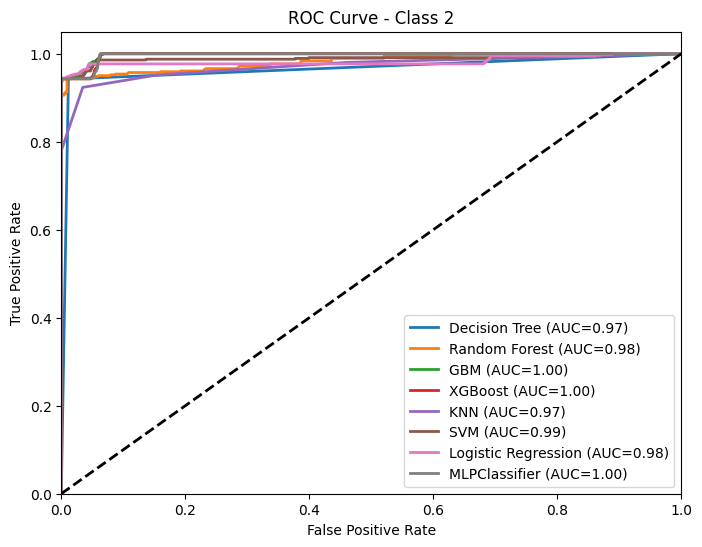

In [ ]:
plt.figure(figsize=(8,6))

for model_name, probs in y_scores.items():
    if model_name in ["Decision Tree", "Random Forest", "GBM", "XGBoost"]:
        y_bin = y_test_label_bin
    else:
        y_bin = y_test_onehot_bin

    # Compute ROC for class 1
    fpr, tpr, _ = roc_curve(y_bin[:,2], probs[:,2])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1], 'k--', lw=2)
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Class 2")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Method 1: Manual Chi-square for each feature (using crosstab for interpretability)
print("\nChi-Square Test for All Features")
feature_columns = ['Discharge', 'Feelings and Urge', 'Pain and Infection',
                   'Physical Conditions', 'Critical Feelings', 'Critical']

chi2_scores = {}
p_values = {}
for col in feature_columns:
    contingency = pd.crosstab(df[col], df['Disease'])
    # pd.crosstab counts occurrences for each combination of feature value and target value
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
    chi2_scores[col] = chi2_stat
    p_values[col] = p_val
    print(f"\n{col} vs Disease:")
    print(f"Chi2 Statistic: {chi2_stat:.4f}, P-value: {p_val:.4f}, DoF: {dof}")
    print("Expected frequencies:\n", expected)
    if p_val < 0.05:
        print("Result: Significant association (reject H0)")
    else:
        print("Result: No significant association (fail to reject H0)")

# Rank features by Chi2 score (higher = more relevant)
ranked_features = sorted(chi2_scores.items(), key=lambda x: x[1], reverse=True)
print("\nRanked Features by Chi2 Score:")
for feature, score in ranked_features:
    print(f"{feature}: {score:.4f} (p-value: {p_values[feature]:.4f})")

most_relevant = ranked_features[0][0]
print(f"\nMost Relevant Feature: {most_relevant}")


Chi-Square Test for All Features

Discharge vs Disease:
Chi2 Statistic: 2268.5866, P-value: 0.0000, DoF: 6
Expected frequencies:
 [[447.43784124 274.86539269 468.69676606]
 [448.94057119 275.78853423 470.27089458]
 [448.94057119 275.78853423 470.27089458]
 [443.68101638 272.55753885 464.76144477]]
Result: Significant association (reject H0)

Feelings and Urge vs Disease:
Chi2 Statistic: 1498.4945, P-value: 0.0000, DoF: 6
Expected frequencies:
 [[448.18920622 275.32696346 469.48383032]
 [450.44330113 276.71167577 471.8450231 ]
 [445.55942881 273.71146577 466.72910542]
 [444.80806384 273.249895   465.94204116]]
Result: Significant association (reject H0)

Pain and Infection vs Disease:
Chi2 Statistic: 0.4048, P-value: 1.0000, DoF: 12
Expected frequencies:
 [[253.58567829 155.7801344  265.63418732]
 [255.8397732  157.1648467  267.99538009]
 [256.21545569 157.39563209 268.38891222]
 [254.33704326 156.24170517 266.42125157]
 [255.8397732  157.1648467  267.99538009]
 [257.34250315 158.08798


Scikit-learn Chi2 Results (Ranked):
Feelings and Urge: Score=746.7562, P-value=0.0000
Physical Conditions: Score=263.8854, P-value=0.0000
Critical Feelings: Score=170.4659, P-value=0.0000
Discharge: Score=124.9247, P-value=0.0000
Critical: Score=20.0085, P-value=0.0000
Pain and Infection: Score=0.0004, P-value=0.9998

Selected Top 3 Features: ['Feelings and Urge', 'Physical Conditions', 'Critical Feelings']



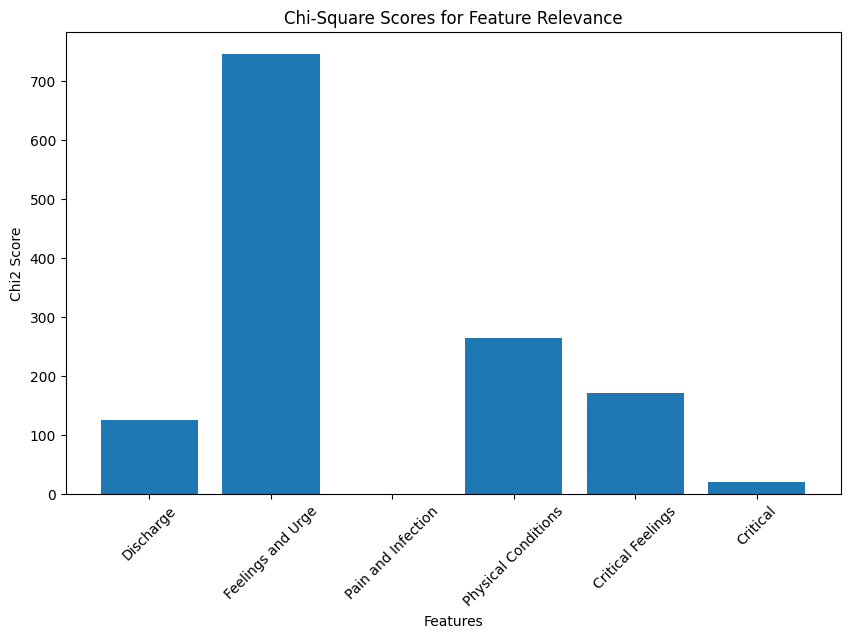

In [ ]:
# Method 2: Using scikit-learn chi2 for automated selection (on encoded data for consistency)
# Use label-encoded features (X_label) and target (y_label)
selector = SelectKBest(score_func=chi2, k='all')  # k='all' to get scores for all
selector.fit(X_label, y_label)
chi2_sk_scores = selector.scores_
chi2_sk_pvalues = selector.pvalues_

feature_names = X_label.columns
sk_results = list(zip(feature_names, chi2_sk_scores, chi2_sk_pvalues))
sk_results.sort(key=lambda x: x[1], reverse=True)
print("\nScikit-learn Chi2 Results (Ranked):")
for name, score, pval in sk_results:
    print(f"{name}: Score={score:.4f}, P-value={pval:.4f}")

# Select top k features (e.g., top 3) and update X_label
k_best = SelectKBest(score_func=chi2, k=3)
X_label_selected = k_best.fit_transform(X_label, y_label)
selected_features = [feature_names[i] for i in k_best.get_support(indices=True)]
print(f"\nSelected Top 3 Features: {selected_features}\n")

plt.figure(figsize=(10, 6))
plt.bar(feature_names, chi2_sk_scores)
plt.title('Chi-Square Scores for Feature Relevance')
plt.xlabel('Features')
plt.ylabel('Chi2 Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top3_features = ['Feelings and Urge', 'Physical Conditions', 'Critical Feelings']
df_top3 = df.copy()

ohe_top3 = OneHotEncoder(sparse_output=False, drop=None)
X_top3 = ohe_top3.fit_transform(df_top3[top3_features])

# Convert to DataFrame with feature names
X_top3 = pd.DataFrame(X_top3, columns=ohe_top3.get_feature_names_out(top3_features))

# Encode target
target_encoder_top3 = LabelEncoder()
y_top3 = target_encoder_top3.fit_transform(df_top3['Disease'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_top3, y_top3, test_size=0.3, random_state=42, stratify=y_top3)

Gradient Boosting Machine Accuracy (Top 3 Features): 0.76

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.44      0.59       537
           1       0.73      0.91      0.81       330
           2       0.73      0.97      0.83       562

    accuracy                           0.76      1429
   macro avg       0.78      0.77      0.74      1429
weighted avg       0.79      0.76      0.73      1429



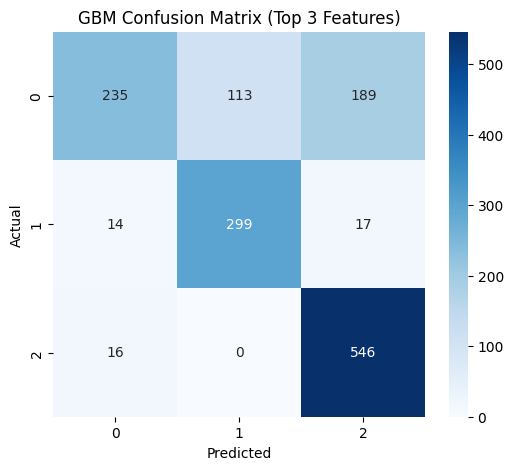

In [ ]:
# Gradient Boosting Machine
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Machine Accuracy (Top 3 Features):", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gbm, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GBM Confusion Matrix (Top 3 Features)")
plt.show()

Random Forest Accuracy (Top 3 Features): 0.75

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.45      0.58       537
           1       0.73      0.91      0.81       330
           2       0.74      0.96      0.83       562

    accuracy                           0.75      1429
   macro avg       0.77      0.77      0.74      1429
weighted avg       0.77      0.75      0.73      1429



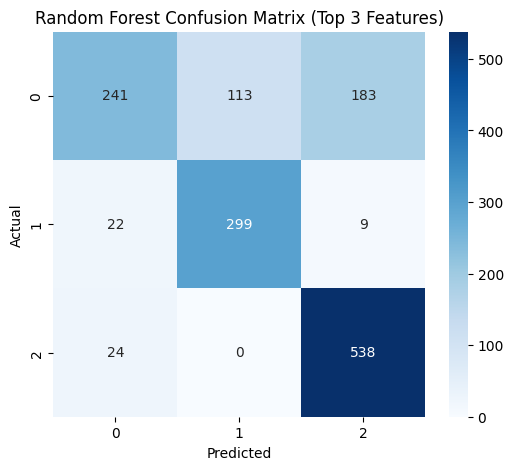

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy (Top 3 Features):", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix (Top 3 Features)")
plt.show()

Logistic Regression Accuracy (Top 3 Features): 0.76

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.42      0.59       537
           1       0.71      0.92      0.80       330
           2       0.71      0.99      0.83       562

    accuracy                           0.76      1429
   macro avg       0.81      0.78      0.74      1429
weighted avg       0.82      0.76      0.73      1429



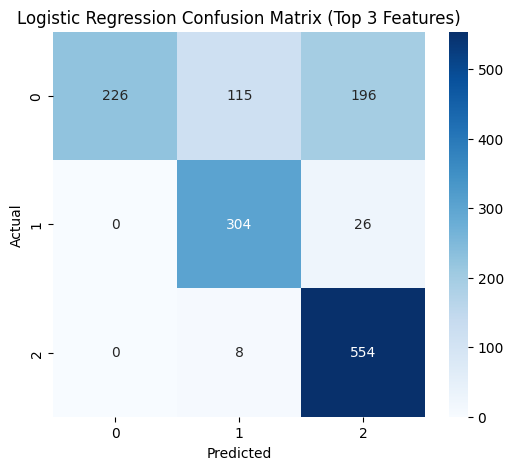

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy (Top 3 Features):", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix (Top 3 Features)")
plt.show()

K-Nearest Neighbour Accuracy (Top 3 Features): 0.71

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.49      0.56       537
           1       0.71      0.77      0.74       330
           2       0.75      0.90      0.81       562

    accuracy                           0.71      1429
   macro avg       0.71      0.72      0.71      1429
weighted avg       0.71      0.71      0.70      1429



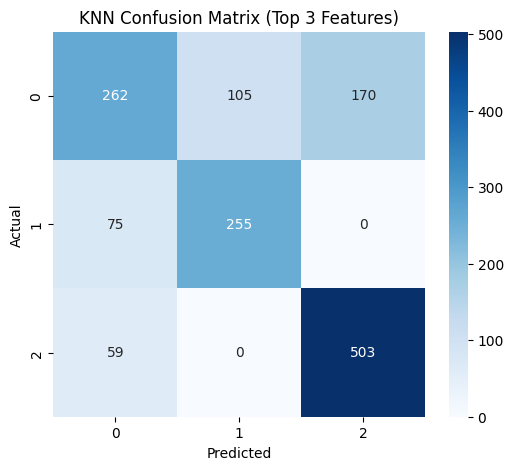

In [ ]:
# K-Nearest Neighbour
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbour Accuracy (Top 3 Features):", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix (Top 3 Features)")
plt.show()

In [ ]:
top4_features = top3_features + ['Discharge']
df_top4 = df.copy()

ohe_top4 = OneHotEncoder(sparse_output=False, drop=None)
X_top4 = ohe_top4.fit_transform(df_top4[top4_features])

# Convert to DataFrame with feature names
X_top4 = pd.DataFrame(X_top4, columns=ohe_top4.get_feature_names_out(top4_features))

# Encode target
target_encoder_top4 = LabelEncoder()
y_top4 = target_encoder_top4.fit_transform(df_top4['Disease'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_top4, y_top4, test_size=0.3, random_state=42, stratify=y_top4)

Gradient Boosting Machine Accuracy (Top 4 Features): 0.95

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       537
           1       0.94      0.92      0.93       330
           2       0.95      0.96      0.95       562

    accuracy                           0.95      1429
   macro avg       0.95      0.95      0.95      1429
weighted avg       0.95      0.95      0.95      1429



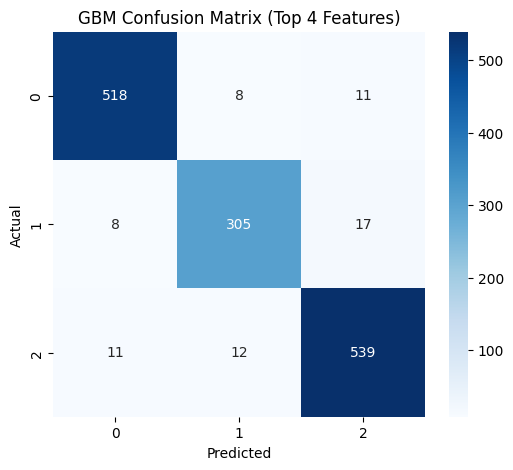

In [ ]:
# Gradient Boosting Machine
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_gbm)
print("Gradient Boosting Machine Accuracy (Top 4 Features):", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_gbm, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("GBM Confusion Matrix (Top 4 Features)")
plt.show()

Random Forest Accuracy (Top 4 Features): 0.95

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       537
           1       0.94      0.92      0.93       330
           2       0.96      0.95      0.95       562

    accuracy                           0.95      1429
   macro avg       0.95      0.94      0.95      1429
weighted avg       0.95      0.95      0.95      1429



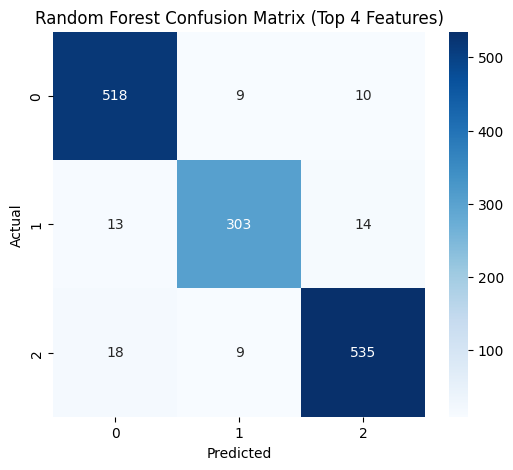

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy (Top 4 Features):", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix (Top 4 Features)")
plt.show()

Logistic Regression Accuracy (Top 4 Features): 0.96

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       537
           1       0.98      0.92      0.95       330
           2       0.93      0.98      0.95       562

    accuracy                           0.96      1429
   macro avg       0.96      0.95      0.96      1429
weighted avg       0.96      0.96      0.96      1429



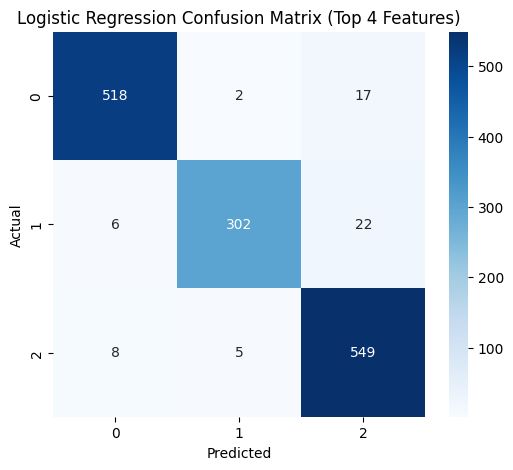

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy (Top 4 Features):", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix (Top 4 Features)")
plt.show()

K-Nearest Neighbour Accuracy (Top 4 Features): 0.96

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       537
           1       0.96      0.93      0.94       330
           2       0.98      0.94      0.96       562

    accuracy                           0.96      1429
   macro avg       0.96      0.95      0.95      1429
weighted avg       0.96      0.96      0.96      1429



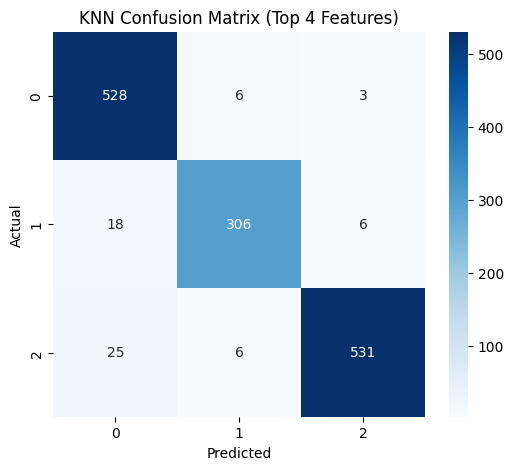

In [ ]:
# K-Nearest Neighbour
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

acc = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbour Accuracy (Top 4 Features):", f"{acc:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_knn, digits=2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix (Top 4 Features)")
plt.show()